# Исследование для интернет-магазина «Стримчик»

### Цель исследования

На основе исторических данных выявить определяющие успешность игры закономерности, чтобы интернет-магазин смог спланировать рекламные компании. 

### Описание данных 
Таблица содержит следующие данные: 
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. 

Данные за 2016 год могут быть неполными.

### План исследования

1. [Открыть файл с данными и изучить общую информацию](#step_1)
2. [Подготовить данные:](#step_2)  
<ul>
<li>Заменить названия столбцов.</li>
<li>Преобразовать данные в нужные типы.</li>
<li>Обработать пропуски при необходимости.</li>
<li>Посчитать суммарные продажи в всех регионах и записать в отдельный столбец.</li>
<li>Проверить наличие дубликатов.</li>
</ul>
3. [Провести исследовательский анализ данных](#step_3)
4. [Составить портреть пользователя для каждого региона:](#step_4)
<ul>
<li>Определить самые популярные платформы.</li>
<li>Определить самые популярные жанры.</li>
<li>Определить, влияет ли рейтинг ESRB на продажи в отдельном регионе?</li>
</ul>
5. [Проверить гипотезы:](#step_5)
<ul>
<li>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.</li>
<li>Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.</li>
</ul>
6. [Общий вывод](#step_6)

<a id='step_1'></a>
### 1. Открыть файл с данными и изучить общую информацию

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
games = pd.read_csv('games.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [36]:
games[pd.isna(games['Year_of_Release']) == True]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Вывод
- Таблица содержит 16715 строк и 11 столбцов. 
- Названия столбцов необходимо привести к нижнему регистру. 
- Пропущенные значения содержатся в следующих столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Наибольшее количество пропусков содержится в последних трех столбцах. Как правило, если данные отсутствуют для одного из них, то отсутствуют данные и для всех трех. Рейтинг от организации ESRB был введен в 1994 году. Следовательно для игр, которые были выпущены до 1994 года он, скорее всего, не будет указан. Отсутвие данных может объясняться источником данных (база данных сайта metacritic), где для ряда игр отсутствует информация об оценке критиков, пользователей, а также рейтинге, так как игра не была размещена на сайте. 
- Столбец Year_of_Release имеет тип данных float, a не int. Также столбец User_Score имеет тип данных object, а не float. 

<a id='step_2'></a>
### 2. Подготовить данные:

#### Заменить названия столбцов

In [5]:
#Сделаем копию таблицы, чтобы не вносить изменения в исходные данные: 
games_copy = games.copy(deep=True)

In [6]:
#Приведем названия столбцов к нижнему регистру: 
games_copy.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
                     'critic_score', 'user_score', 'rating']
games_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Обработать пропуски

In [7]:
#Для столбцов name и genre пропущено всего одно значение. 
#Удалим такие случаи из данных: 
games_copy = games_copy.dropna(subset = ['name', 'genre'])

In [8]:
#Столбец с годом релиза игры также не содержит большое количество пропусков: удалим строки с пропусками из наших данных: 
games_copy = games_copy.dropna(subset = ['year_of_release'])

In [9]:
#Далее обработаем пропуски для столбца user_score. В 2 376 случаях в этом столбце указано «tbd» - to be determined.
#Это означает, что игра имеет менее 4-х отзывов в базе данных metacritic. В таких случаях рейтинг игры не отображается на сайте. 
games_copy.query('user_score == "tbd"').count()

name               2376
platform           2376
year_of_release    2376
genre              2376
na_sales           2376
eu_sales           2376
jp_sales           2376
other_sales        2376
critic_score       1056
user_score         2376
rating             2326
dtype: int64

In [10]:
#Заменим все случаи, в которых указано 'tbd' на 'NaN'.
games_copy.user_score = games_copy.user_score.replace('tbd', 'NaN')

#### Преобразовать данные в нужные типы

In [11]:
#Столбец user_score имеет тип данных object. Он содержит информацию с оценками пользователей (максимальное значение 10). 
#Приведем его к типу данных float: 
games_copy.user_score = games_copy.user_score.astype('float')

In [12]:
#Приведем столбец с годом выпуска игры к типу данных int. Нет смысла приводить данные к типу данных datetime, так как нам известен
#только год релиза игры:
games_copy.year_of_release = games_copy.year_of_release.astype('int')
#Тип данных для столбца с оценкой пользователей был изменен на этапе обработки пропусков (см. «Обработать пропуски») 
#в данных с object на float. 

#### Посчитать суммарные продажи во всех регионах

In [13]:
#Посчитатем суммарные продажи во всех регионах и запишем их в отдельный столбец total_sales: 
games_copy['total_sales'] = games_copy['na_sales'] + games_copy['eu_sales'] + games_copy['jp_sales'] + games_copy['other_sales']

In [37]:
#Проверим полученный результат: 
games_copy.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


#### Проверить наличие дубликатов

In [15]:
games_copy.duplicated().sum()

0

### Вывод
- Типы данных были заменены в двух столбцах. Это столбец user_rating, который имел тип дпнных object. Столбец содержит данные с оценками пользователями игр. Данные были приведены к типу float. Также данные в столбце year_of_release были заменены с типа float на int. Нет смысла приводить данные к типу данных datetime, так как нам известен только год релиза игры, то есть никаких других полезных данных из этого показателя мы извлечь не можем. 
- Пропуски для столбцов name, genre, year_of_release были удалены, так как таких пропусков было немного (менее 2% от общего объема данных). 
- Столбцы, которые содержат информацию об отзывах критиков, пользователей и рейтинге игры содержат большое количество пропусков (примерно 50% от общего объем данных). У нас недостаточно данных, для того, чтобы восстановить эти пропуски. Оставим их незаполненными.
- Данные не содержат дубликатов. 

<a id='step_3'></a>
### 3. Провести исследовательский анализ данных 

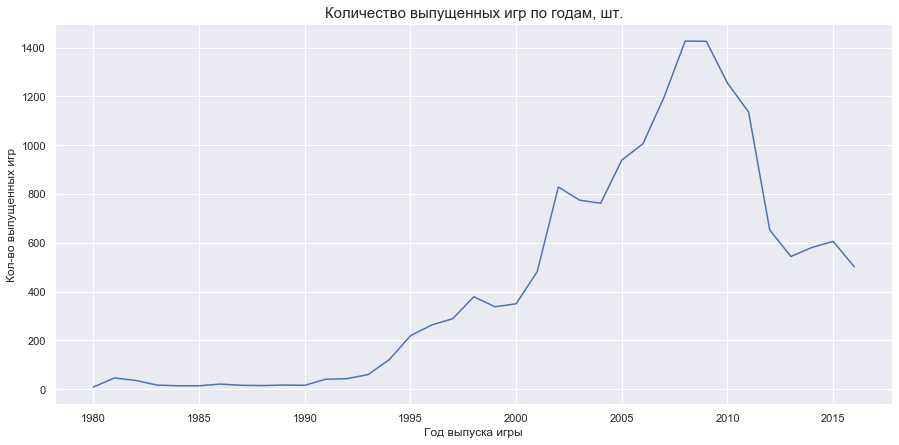

In [43]:
#Посмотрим, сколько игр выпускалось за разные годы: 
sns.set(rc={'figure.figsize':(15,7)})
games_releases = games_copy.pivot_table(index=['year_of_release'], values='name', aggfunc='count')
games_releases = games_releases.reset_index() 
sns.set()
games_releases_plot = sns.lineplot(x="year_of_release", y="name",
             data=games_releases)
games_releases_plot.set(xlabel = 'Год выпуска игры', ylabel='Кол-во выпущенных игр')
games_releases_plot.axes.set_title("Количество выпущенных игр по годам, шт.", fontsize=15);
#До 1994 года выпускалась менее 100 игр в год. Эти данные можно не учитывать в исследовании. 

In [17]:
#Выберем платформы с наибольшими суммарными продажами: 
top_5 = list(games_copy.groupby('platform')['total_sales'].sum().sort_values(ascending = False).index)[0:5]
#Выберем данные только по платформам с наибольшими суммарными продажами: 
top_5_data = games_copy.query('platform in @top_5')

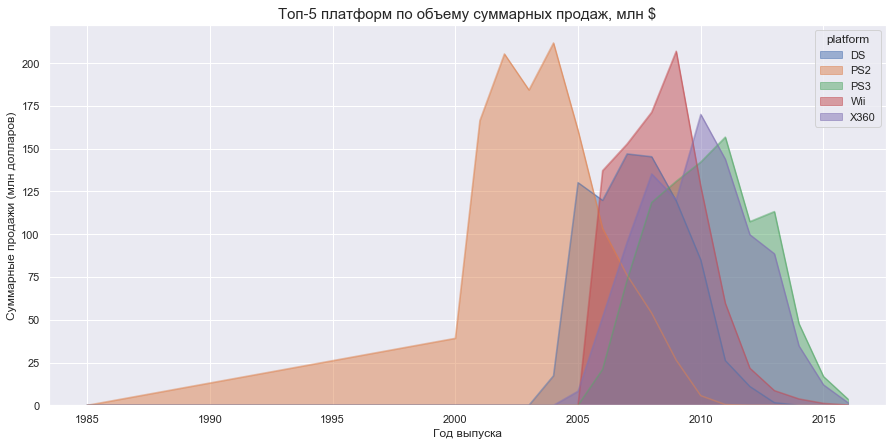

In [56]:
#Построим сводную таблицу с распределением по годам:
top_5_pivot = top_5_data.pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc='sum')
#Построим график:
sns.set()
top_5_plot = top_5_pivot.plot.area(stacked=False, figsize=(15, 7), grid=True)
top_5_plot.set(xlabel='Год выпуска', ylabel='Суммарные продажи (млн долларов)')
top_5_plot.axes.set_title("Топ-5 платформ по объему суммарных продаж, млн $", fontsize=15);



Cреднее кол-во лет существования платформы: 14.0
Медианное значение для кол-ва лет существования платформы: 11.0


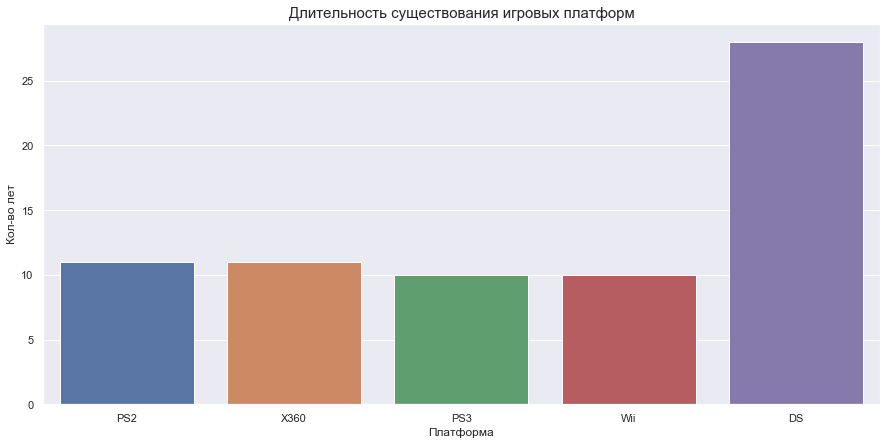

In [49]:
#Построим график с указанием кол-ва лет сущестования для каждой платформы: 
platforms_years_diff = {}
for each_platform in top_5: 
    each_platform_slice = top_5_data.query('platform == @each_platform')
    platforms_years_diff[each_platform] = each_platform_slice.year_of_release.max() - each_platform_slice.year_of_release.min()
platforms_years_diff = pd.DataFrame.from_dict(platforms_years_diff, orient='index')
platforms_years_diff.columns = ['years_diff']
platforms_years_diff_barplot = sns.barplot(x=platforms_years_diff.index, 
                                                 y='years_diff', 
                                                 data=platforms_years_diff)
platforms_years_diff_barplot.set(xlabel='Платформа', ylabel='Кол-во лет')
platforms_years_diff_barplot.axes.set_title("Длительность существования игровых платформ", fontsize=15);
print('Cреднее кол-во лет существования платформы:', platforms_years_diff.years_diff.mean())
print('Медианное значение для кол-ва лет существования платформы:', platforms_years_diff.years_diff.median())



Анализируя данные графика, можно сказать, что в среднем появляются новые и исчезают старые платформы в пределах **10 лет**. 
Это подтверждают и данные столбчатой диаграммы. Большая часть платформ существует 10 лет. Среднее равно 14, но это значение завышено засчет платформы DS, которая существует на рынке более 25 лет! Последнее подтверждает и показатель медианного значения, равный 14. 

In [20]:
#Учитывая замечание выше, построим наше исследование на данных за 2010-2016 гг.: 
games_actual_data = games_copy.query('year_of_release >= 2010')

In [21]:
#Посмтрим, какие плтаформы лидируют по продажам: 
games_actual_data.groupby('platform')['total_sales'].sum().sort_values(ascending = False)

platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
WiiU     82.19
PSP      64.05
PSV      53.81
PS2       6.09
Name: total_sales, dtype: float64

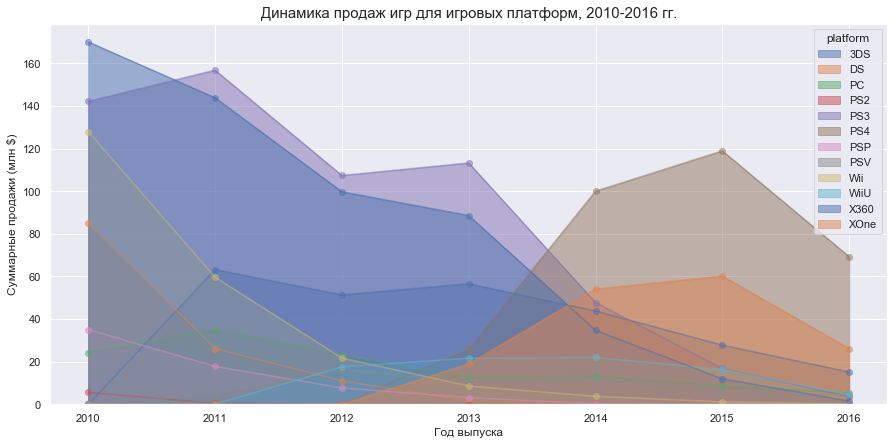

In [53]:
#Построим график с динамикой продаж по каждой платформе за выбранный период времени (всего 12 платформ): 
platforms_sales_pivot = games_actual_data.pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc='sum')
platforms_sales_plot = platforms_sales_pivot.plot.area(stacked=False, figsize=(15, 7), grid=True, style='o-')
platforms_sales_plot.set(xlabel='Год выпуска', ylabel='Суммарные продажи (млн $)')
platforms_sales_plot.axes.set_title("Динамика продаж игр для игровых платформ, 2010-2016 гг.", fontsize=15);


- За 10 лет продажи большинства платформ значительно упали. Особенно наглядно это видно по таким платформам, как PS3 и X360.
- Интересно, что за последний год роста не было зафикисировано ни для одной из платформ. 
- В целом можно сказать, что за 2013-2016 гг. наиболее крупными игроками являются **PS4** (суммарные продажи игр на этой плфтомре составили 119 млн долларов в 2015 году, 69 — в 2016), **XOne** (суммарные продажи игр составили 60 млн долларов в 2015 году и более 26 млн в 2016), третьим лидером 2015-2016 гг. является платформа **3DS** (суммарные продажи игр составили 28 и 15 млн долларов в 2015 и 2016 соответственно). 

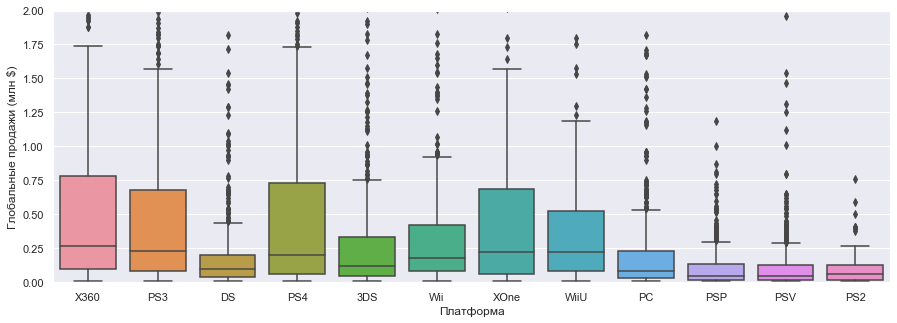

In [54]:
#Построим график «ящик с усами» по глобальным продажам каждой игры с разбивкой по платформам: 
fig, ax = plt.subplots(figsize=(15, 5))
platforms_games_sales_boxplot = sns.boxplot(x='platform', y='total_sales', data=games_actual_data)
platforms_games_sales_boxplot.set_ylim(0, 2)
platforms_games_sales_boxplot.set(xlabel='Платформа', ylabel='Глобальные продажи (млн $)'); 

Разница в продажах для всех плафторм существенная, о чем свидетельствуют межквартильные размахи. Кроме того, большая часть данных 
содержит выбросы. Медианное значение также значительно варьируется от платформе к платформе.

''

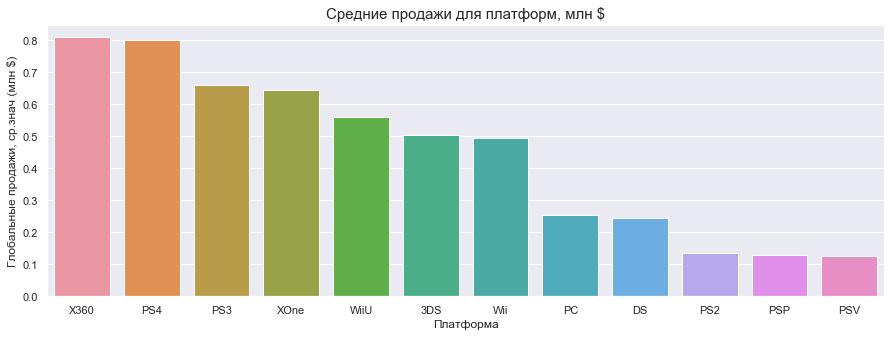

In [57]:
#Теперь посмотрим на разницу в средних продажах на разных платформах: 
paltforms_games_sales_mean = games_actual_data.pivot_table(index=['platform'], 
                                                           values='total_sales', 
                                                           aggfunc='mean').sort_values(by='total_sales', ascending=False)
paltforms_games_sales_mean = paltforms_games_sales_mean.reset_index() 
fig, ax = plt.subplots(figsize=(15, 5))
paltforms_games_sales_mean_barplot = sns.barplot(x='platform', 
                                                 y='total_sales', 
                                                 data=paltforms_games_sales_mean)
paltforms_games_sales_mean_barplot.set(xlabel='Платформа', ylabel='Глобальные продажи, ср.знач (млн $)')
paltforms_games_sales_mean_barplot.axes.set_title("Средние продажи для платформ, млн $", fontsize=15);

; 

Средние продажи на разных платформах также сильно различаются. Отметим, невыскоие значения, как для медианных, так и для средних значений
в пределах 0,1 млн, что говорит о значительно вариабельности данных.

X360


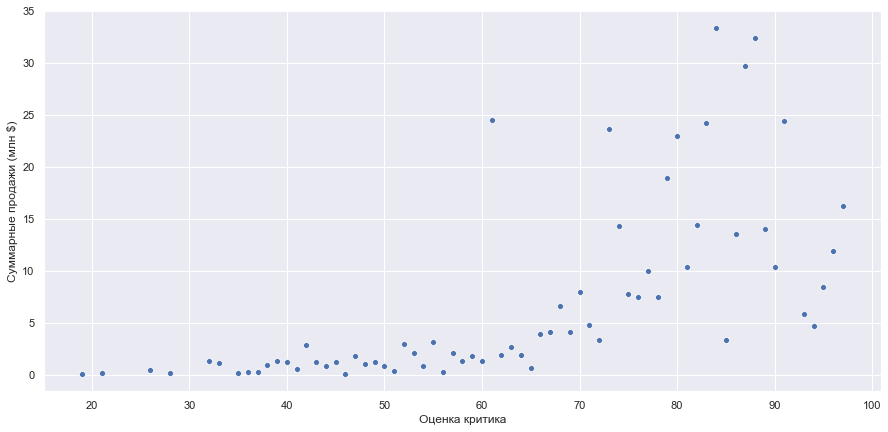

Коэффициент корреляции: 0.6603722291237951

PS3


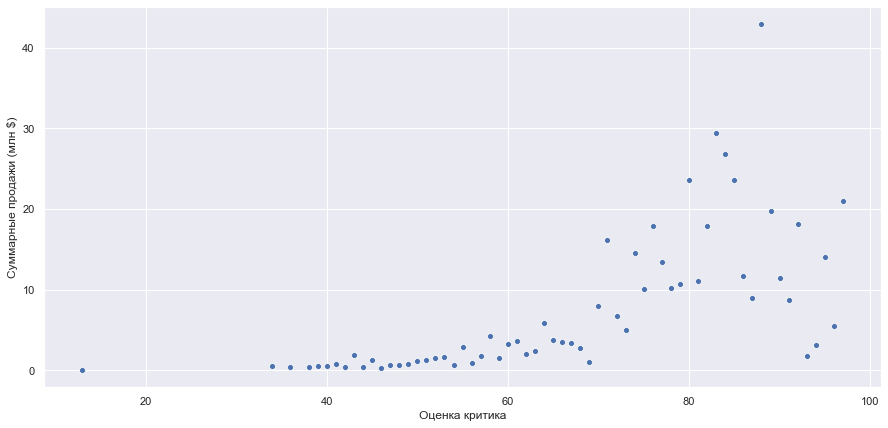

Коэффициент корреляции: 0.6688606300833652

DS


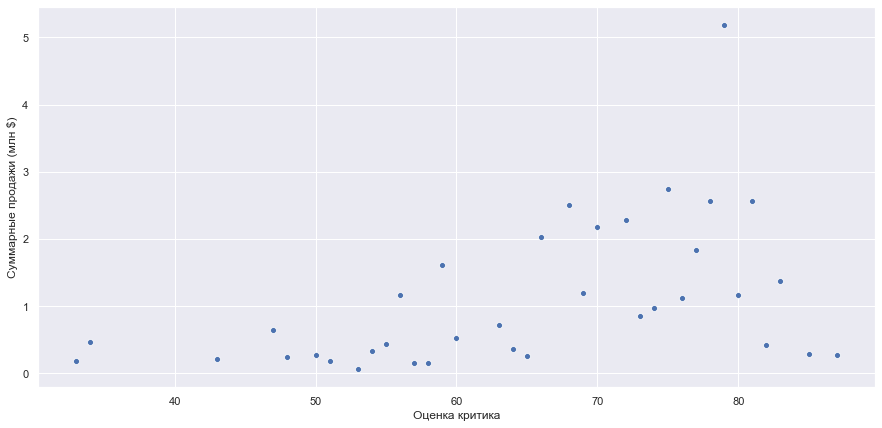

Коэффициент корреляции: 0.4766658256226775

PS4


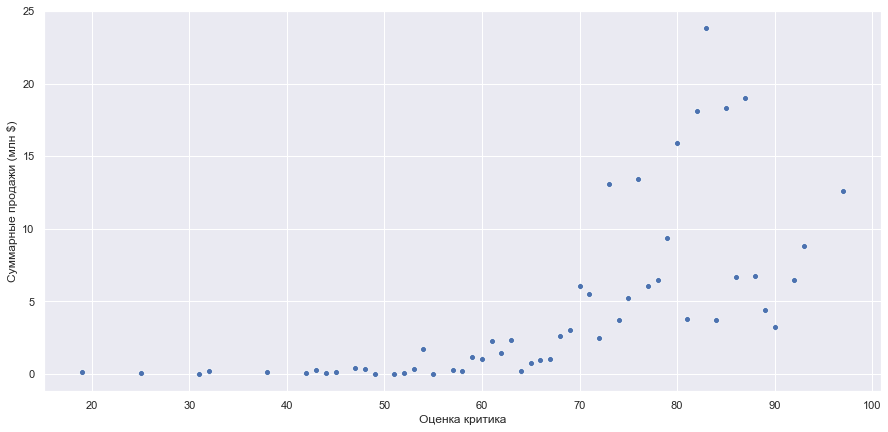

Коэффициент корреляции: 0.6588377171476643

3DS


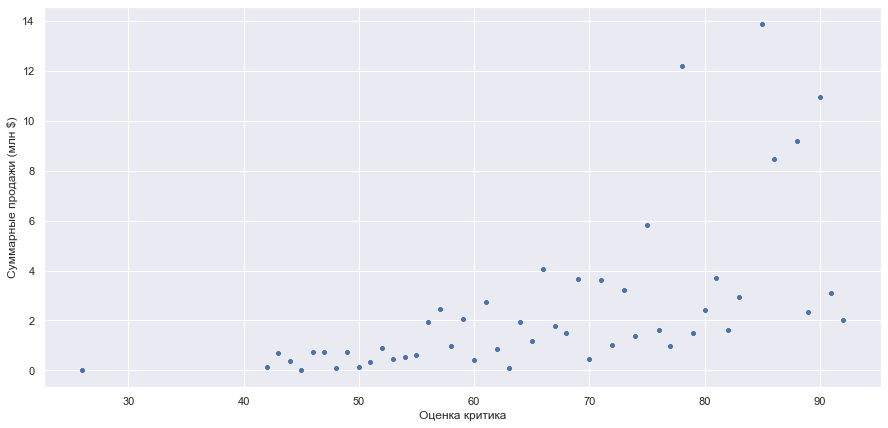

Коэффициент корреляции: 0.5941217525171616

Wii


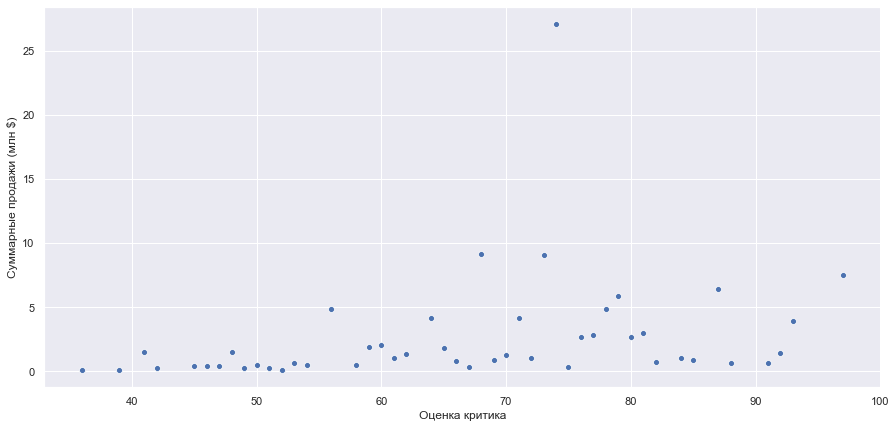

Коэффициент корреляции: 0.29138748433726286

XOne


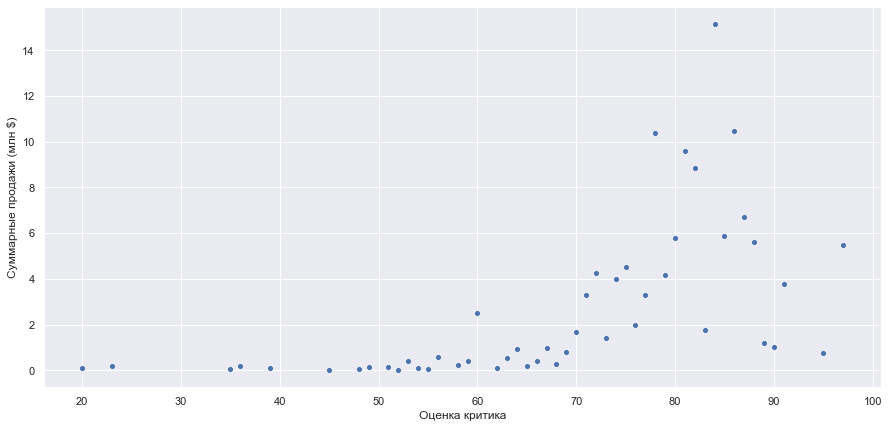

Коэффициент корреляции: 0.5834081573978301

WiiU


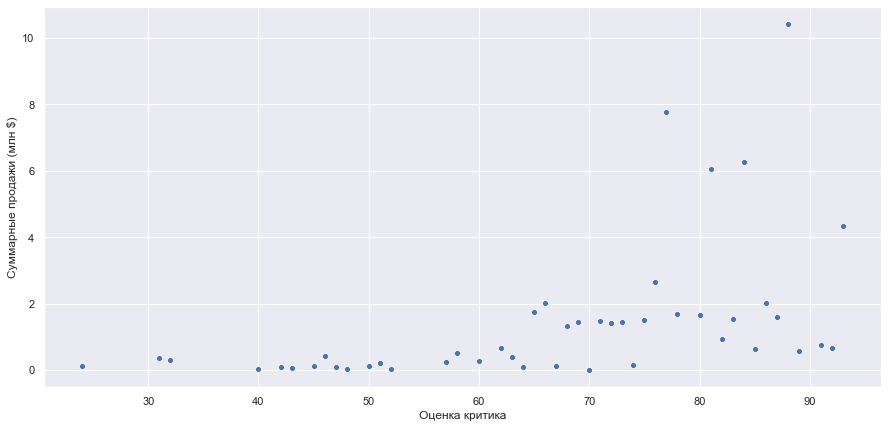

Коэффициент корреляции: 0.4910302110144189

PC


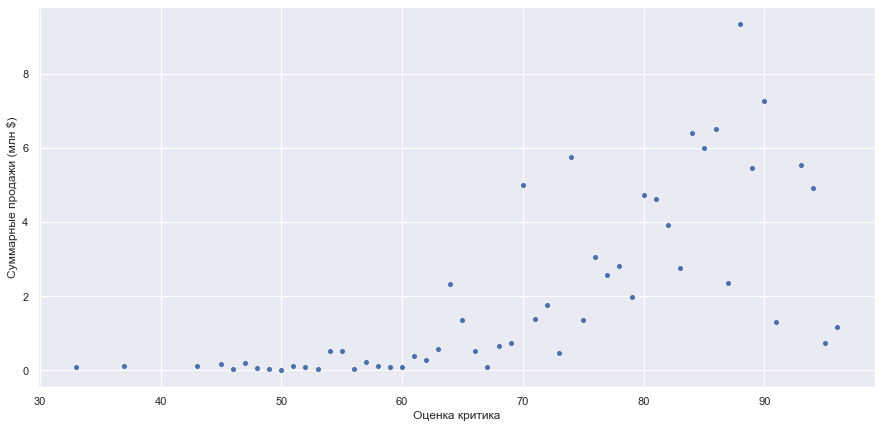

Коэффициент корреляции: 0.7016499608634366

PSP


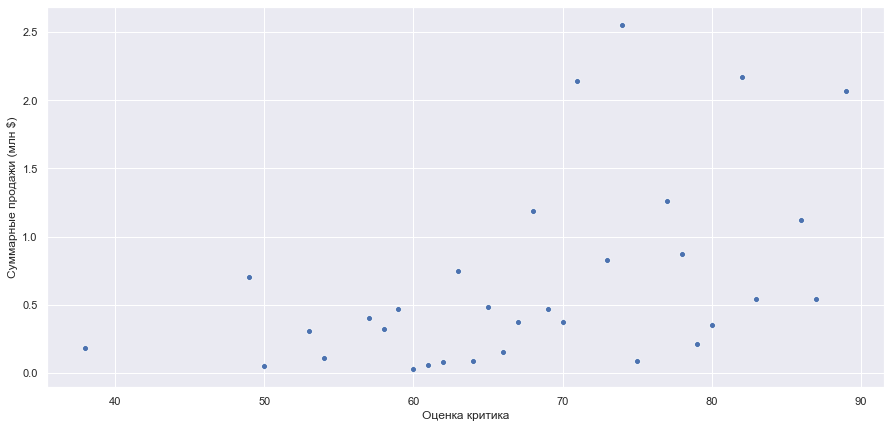

Коэффициент корреляции: 0.48816247567006693

PSV


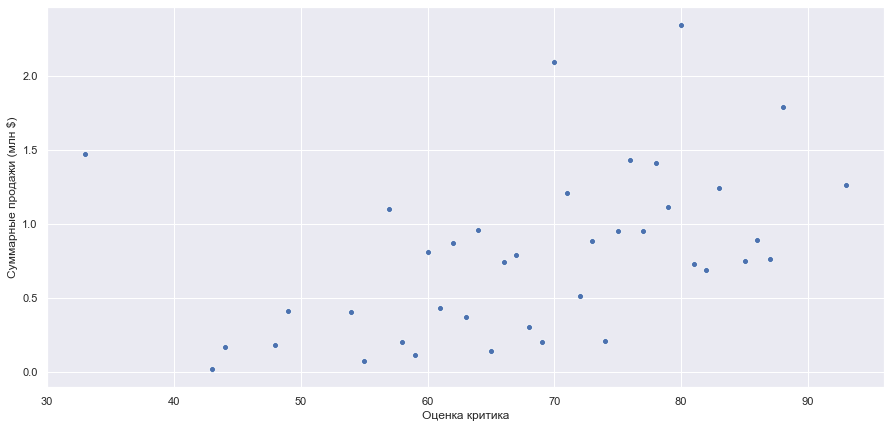

Коэффициент корреляции: 0.4414794600727158

PS2


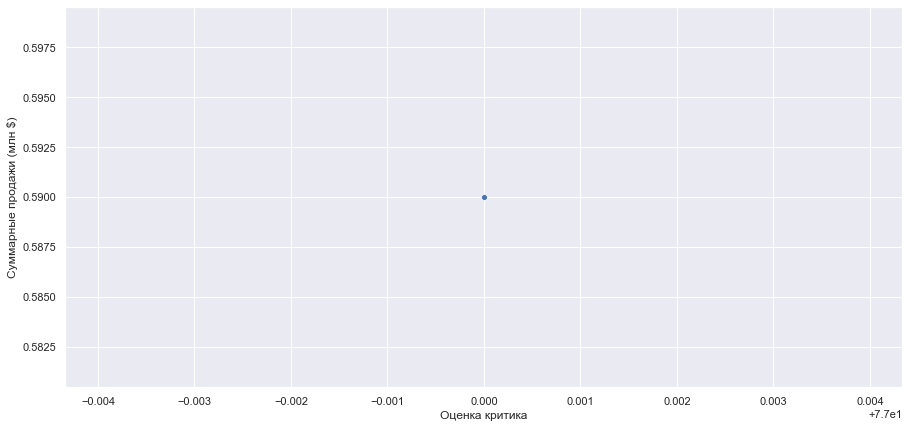

Коэффициент корреляции: nan



/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [58]:
#Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
#Для этого построим диаграммы рассеяния и вычислим коэффициент корреляции: 
def critics_scatter_corr(): 
    try:
        for each_platform in list(games_actual_data.platform.unique()): 
            platform_slice = games_actual_data.query('platform == @each_platform')
            platform_slice = platform_slice.pivot_table(index=['critic_score'], values='total_sales', aggfunc='sum')
            platform_slice = platform_slice.reset_index()
            print(each_platform)
            scatterplot = sns.scatterplot(x="critic_score", y="total_sales", data=platform_slice)
            scatterplot.set(xlabel='Оценка критика', ylabel='Суммарные продажи (млн $)')
            plt.show()
            print('Коэффициент корреляции:', platform_slice.critic_score.corr(platform_slice.total_sales))
            print()
    except: 
        print('error')
critics_scatter_corr()

О явной зависимости объема продаж от оценок критиков можно говорить лишь для некоторых платформ. К таковым можно отнести: X360, PS3, PS4, XOne и PC. О зависимости свидетельствуют и показатели коэффициента корреляции для этих платформ. Для большинства платформ зависимости выявлено не было, о чем свидетельствуют и диаграммы рассеяния и чуть меньшие по значению коэффициенты корреляции. 

X360


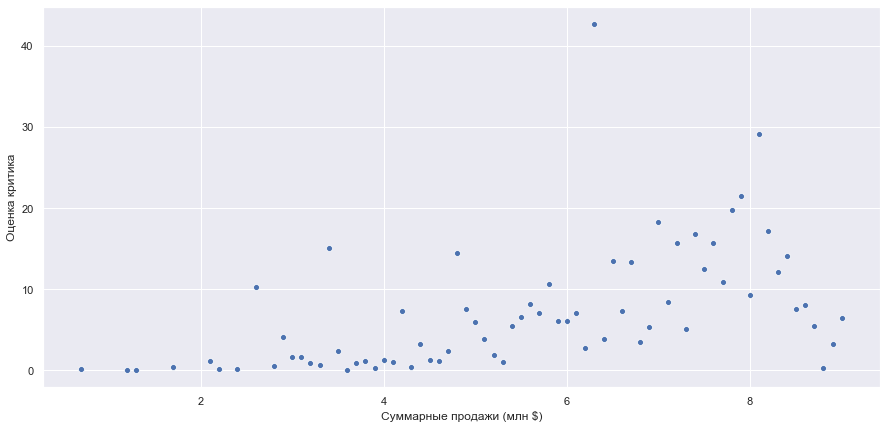

Коэффициент корреляции: 0.5179435291521

PS3


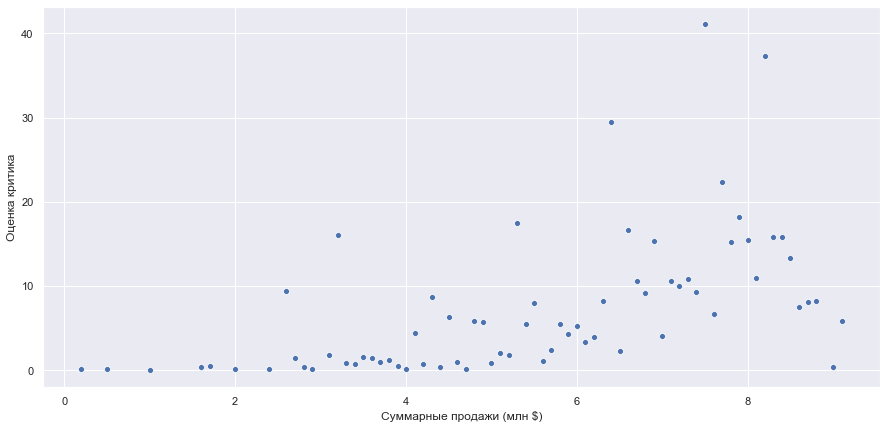

Коэффициент корреляции: 0.5501841731422352

DS


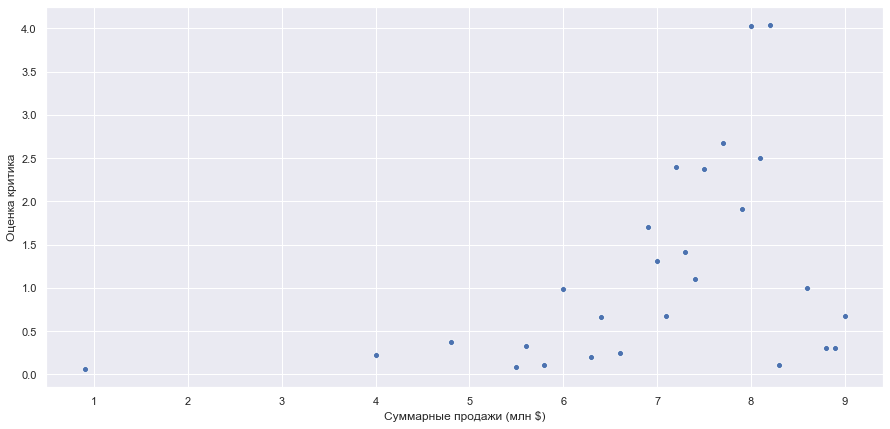

Коэффициент корреляции: 0.40562670664280925

PS4


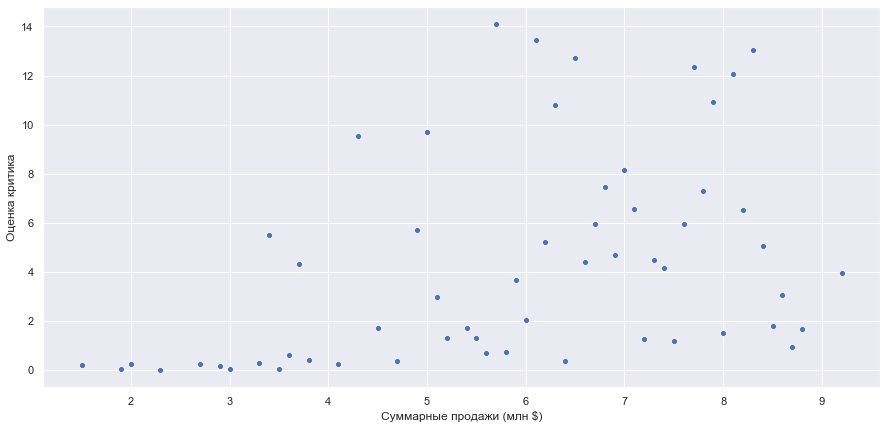

Коэффициент корреляции: 0.4185021550618359

3DS


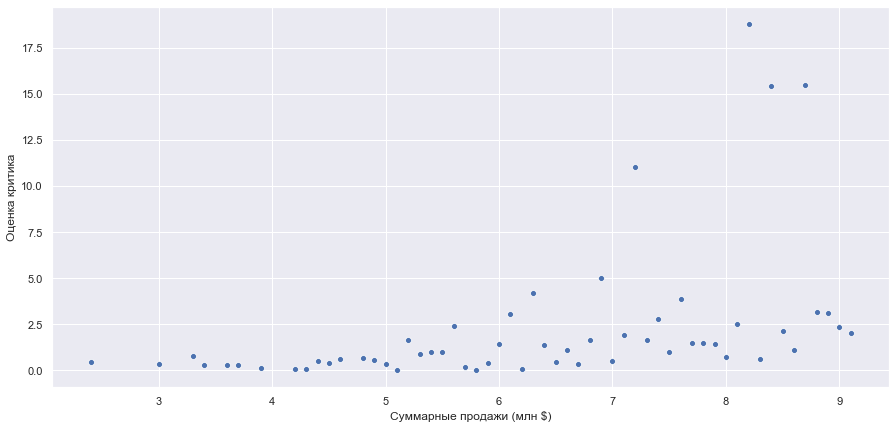

Коэффициент корреляции: 0.4393163284049475

Wii


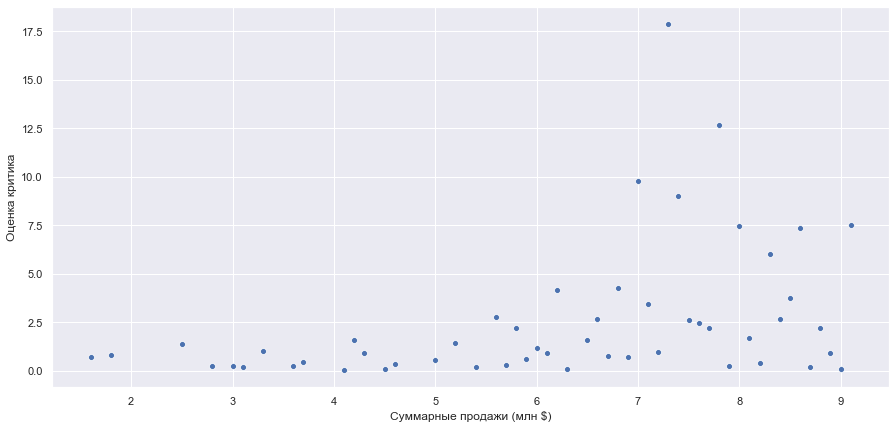

Коэффициент корреляции: 0.3894817095247229

XOne


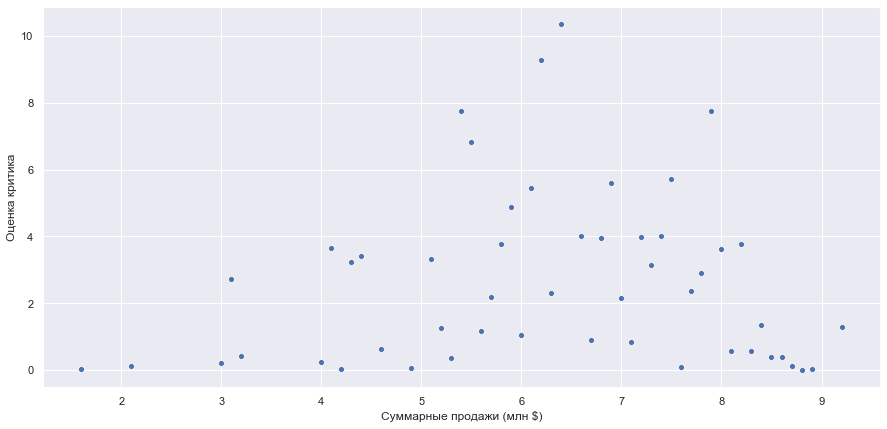

Коэффициент корреляции: 0.07352400781969082

WiiU


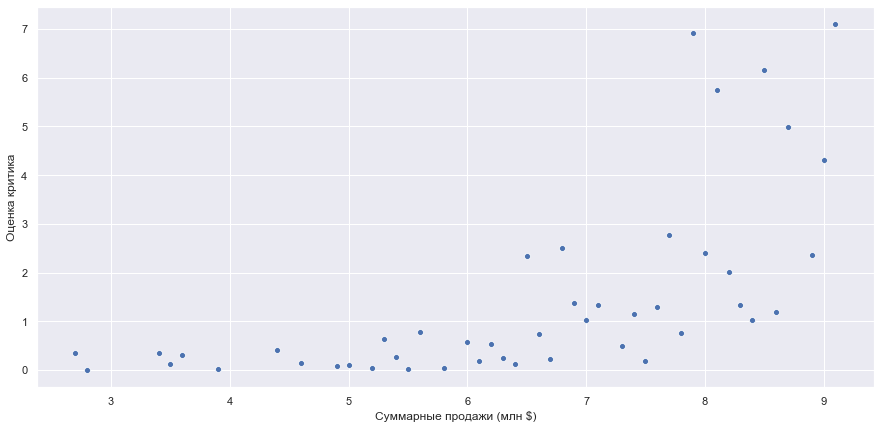

Коэффициент корреляции: 0.6355976450017836

PC


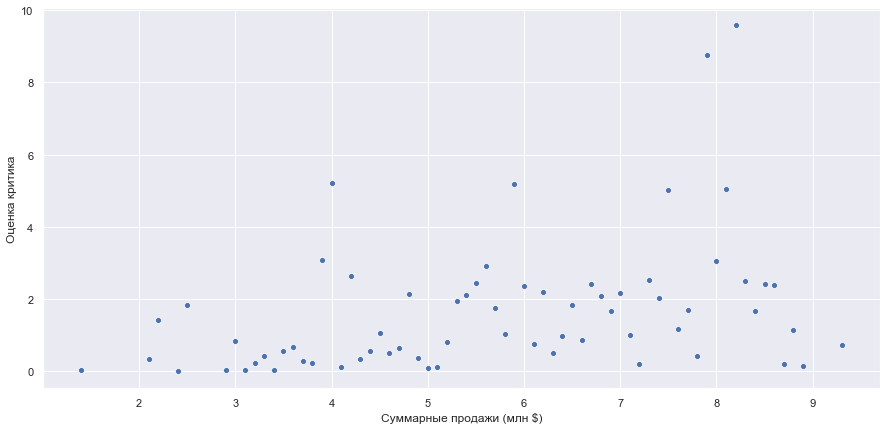

Коэффициент корреляции: 0.36828416568018735

PSP


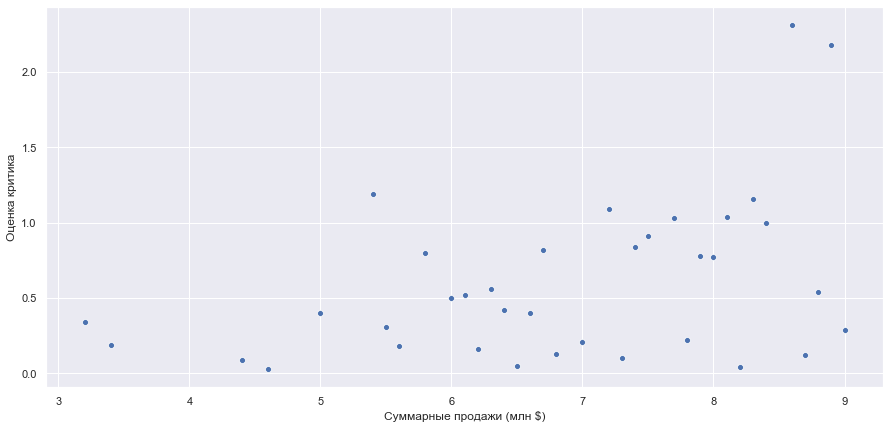

Коэффициент корреляции: 0.4261732923243628

PSV


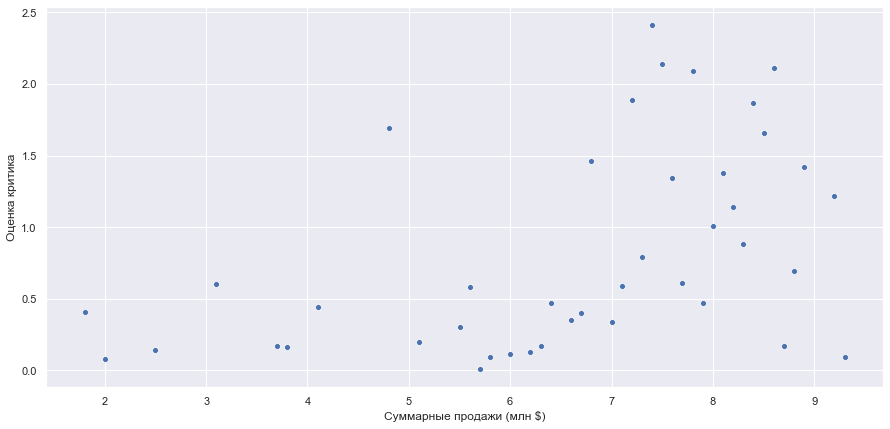

Коэффициент корреляции: 0.4664289809890812

PS2


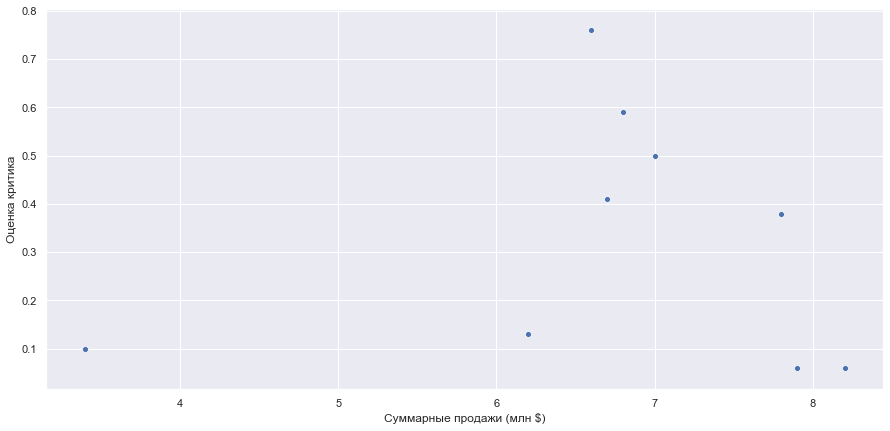

Коэффициент корреляции: 0.0747237551430143



In [59]:
#Посмотрим аналогичные показатели для оценок пользователей: 
def users_scatter_corr(): 
    try:
        for each_platform in list(games_actual_data.platform.unique()): 
            platform_slice_users = games_actual_data.query('platform == @each_platform')
            platform_slice_users = platform_slice_users.pivot_table(index=['user_score'], 
                                                                    values='total_sales', 
                                                                    aggfunc='sum')
            platform_slice_users = platform_slice_users.reset_index()
            print(each_platform)
            scatterplot = sns.scatterplot(x="user_score", y="total_sales", data=platform_slice_users)
            scatterplot.set(xlabel='Суммарные продажи (млн $)', ylabel='Оценка критика')
            plt.show()
            print('Коэффициент корреляции:', platform_slice_users.user_score.corr(platform_slice_users.total_sales))
            print()
    except: 
        print('error')
users_scatter_corr()

Говорить о зависимости объема продаж от оценок пользователей также не приходится. Отсутствие зависимости явно следует из графиков, а также показателей коэффициентов корреляции, большая часть которых находится в пределах 0,5. Исключением является платформа WiiU. Показатель коэффициента корреляции – 0.6. Исходя из данных диаграммы рассеяния также можно сделать вывод о зависимости этих двух показателей для платформы. 

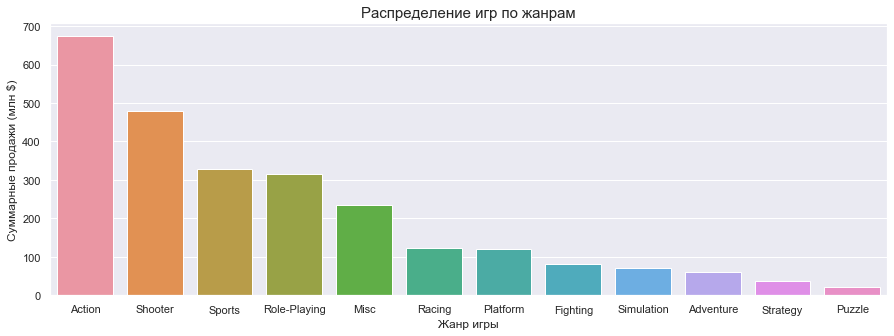

In [60]:
#Далее рассмотрим распределение игр по жанрам: 
genre_sales = games_actual_data.pivot_table(index='genre', 
                                            values='total_sales', 
                                            aggfunc='sum').sort_values(by='total_sales', ascending=False)
genre_sales = genre_sales.reset_index()
fig, ax = plt.subplots(figsize=(15, 5))
genre_sales_plot = sns.barplot(x='genre', 
            y='total_sales',
            data=genre_sales)
genre_sales_plot.set(xlabel='Жанр игры', ylabel='Суммарные продажи (млн $)')
genre_sales_plot.axes.set_title("Распределение игр по жанрам", fontsize=15);

На данном этапе мы выяснили, что наиболее прибыльными являются игры в жанрах Action (673 млн долларов), Shooter (480 млн долларов), Sports (328 млн долларов). Наименее прибыльными - Adventure (61 млн долларов), Strategy (36 млн долларов), Puzzle (21 млн долларов). 

<a id='step_3'></a>
### Вывод
- Мы выяснили, что данные за все периоды не являются актуальными для нас. В среднем новые платформы появляются и исчезают в период от 5 до 10 лет. Таким образом, в нашем исследовании мы будем обращаться к данным за 10 лет, то есть **с 2010 по 2016 гг.** включительно. 
- Мы также выявили, что за этот период **объем продаж игр для большинства платформ значительно снизился**. Наиболее яркими примерами являются такие платформы, как PS3 (суммарные продажи составили 140 млн долларов в 2010 году и менее 20 млн в 2016) и X360 (в 2010 году компания заработала 170 млн долларов от продаж игр и менее 2 млн в 2016). К наиболее крупным игрокам рынка за последние три года можно отнести такие платформы как **PS4** (суммарные продажи игр на этой плфтомре составили 119 млн долларов в 2015 году, 69 — в 2016), **XOne** (суммарные продажи игр составили 60 млн долларов в 2015 году и более 26 млн в 2016), третьим лидером 2015-2016 гг. является платформа **3DS** (суммарные продажи игр составили 28 и 15 млн долларов в 2015 и 2016 соответственно). 
- **Разница в продажах на разных платформах является существенной**, что наглядно демонистрируют график «ящик с усами» для каждой платформы. Медианные и средние значения также варьируются. Например, среднее для платформ X360 и PS4 - 0,8 млн долларов, а для PSP и PSV — 01.
- **Отзывы критиков и пользователей не имеют существенного влияния на объем продаж игр**, что наглядно демонстрируют диаграммы рассеяния. Зависимость объема продаж от оценок критиков была выявлена для пяти платформ из 12. К таковым относятся X360 (коэфф. корр., здесь и далее в скобках: 0,7 ), PS3 (0,7), PS4 (0,7), XOne (0,6) и PC (0,7). Что касается зависимости объема продаж от оценок пользователей, то здесь также не было выявлено зависимости. Для большей части платформ коэффициент корреляции находится в пределах (0,5). Исключением является платформа WiiU. Показатель коэффициента корреляции – 0.6. Диаграмма рассеяния также свидетельствует о наличии зависимости для этих двух показателей.  
- Наиболее прибыльными жанрами являются жанры **экшн** (суммарная прибыль 673 млн долларов за 10 лет), **шутер** (480 млн) и **спортивные игры** (328 млн). Наименее прибыльными – приключения (61 млн), стратегия (36 млн) и головоломки (21 млн). В целом, можно сказать, что явно выделяются жанры с высокими и низкими продажами. Здесь следует отметить, что игры жанров Action и Shooter довольно дороги в производстве по сравнению с играми в жанре головоломки. 


<a id='step_4'></a>
### 4. Составить портрет пользователя для каждого региона:

#### Определить самые популярные платформы

na_sales


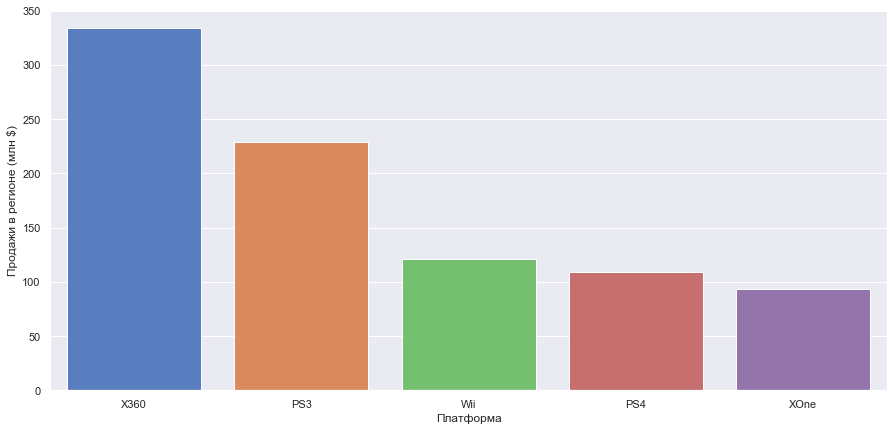

eu_sales


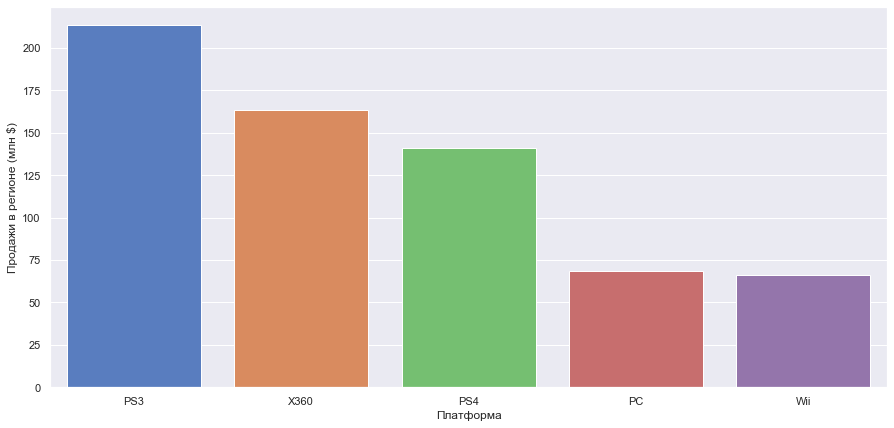

jp_sales


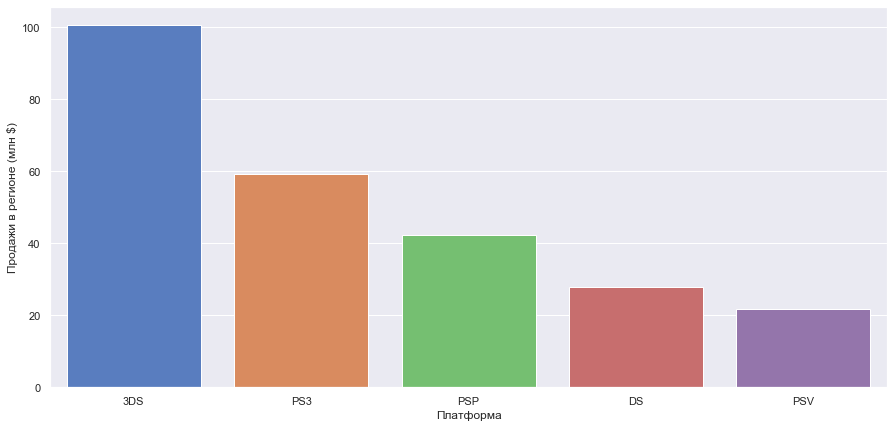

In [61]:
region_sales = ['na_sales', 'eu_sales', 'jp_sales']
def most_popular_platforms(columns_list):
    for column in columns_list: 
        try:
            top5 = games_actual_data.pivot_table(index='platform', 
                                                    values=column, 
                                                    aggfunc='sum').sort_values(by=column, ascending=False)[0:5]
            top5 = top5.reset_index()
            top5_plot = sns.barplot(x='platform', 
                        y=column,
                        palette='muted',
                        data=top5)
            print(column)
            top5_plot.set(xlabel='Платформа', ylabel='Продажи в регионе (млн $)')
            plt.show()
        except: 
            print('Error')
most_popular_platforms(region_sales)

- В Европе и Северной Америке лидерами по объему проданных игр являются X360 и PS3. В Северной Америке для платформы X360 было продано игр на сумму около 350 млн долларов, для платформы PS3 — на сумму более 200 млн. В Европе объем продаж в целом меньше для всех платформ. В частности, для платформы PS3 было продано игр на сумму более 200 млн, а для платформы X360 более 150. 
- В Японии по продажам также лидирует PS3, но первенство принадлежит платформе 3DS (100 млн долларов было получено с продаж игр для этой платформы).

#### Определить самые популярные жанры

na_sales


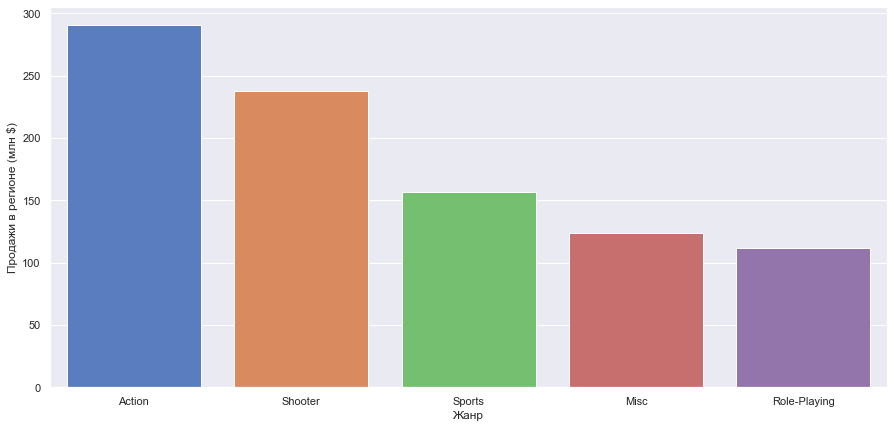

eu_sales


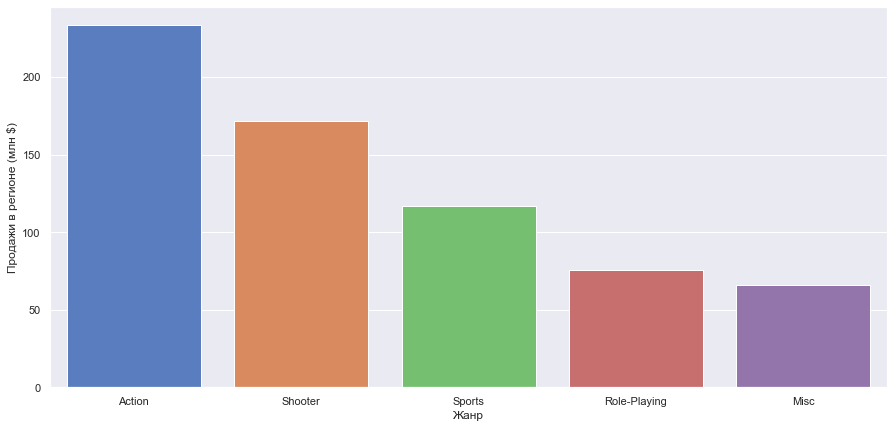

jp_sales


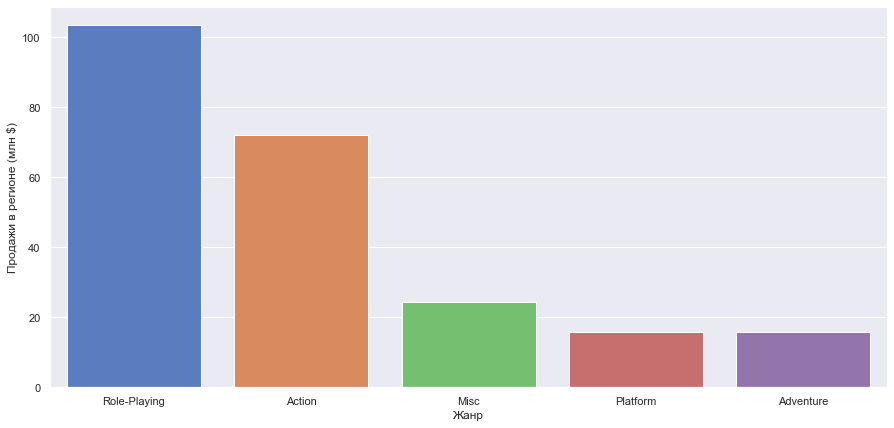

In [62]:
def most_popular_genres(columns_list): 
     for column in columns_list: 
            try:
                top_genres = games_actual_data.pivot_table(index='genre', 
                                                        values=column, 
                                                        aggfunc='sum').sort_values(by=column, ascending=False)[0:5]
                top_genres = top_genres.reset_index()
                top_genres_plot = sns.barplot(x='genre', 
                            y=column,
                            palette='muted',
                            data=top_genres)
                print(column)
                top_genres_plot.set(xlabel='Жанр', ylabel='Продажи в регионе (млн $)')
                plt.show()
            except: 
                print('Error')
most_popular_genres(region_sales)

- Наиболее популярными жанрами, как в Европе, так и Америке являются экшн, шутер и спортивные игры. 
- По сравнению с Европой в Америке наибольшей популярностью пользуются игры смешанного жанра по сравнению с ролевыми играми. 
- В Японии лидируют ролевые игры. Также, как американцы и европейцы, японцы любят экшн. На третьем месте расположились игры смешанного жанра. В отличие от Европы и Америки в первую пятерку любимых жанров японцев также вошли приключенческие игры и жанр Platform. 

#### Определить, влияет ли рейтинг ESRB на продажи в отдельном регионе?

na_sales


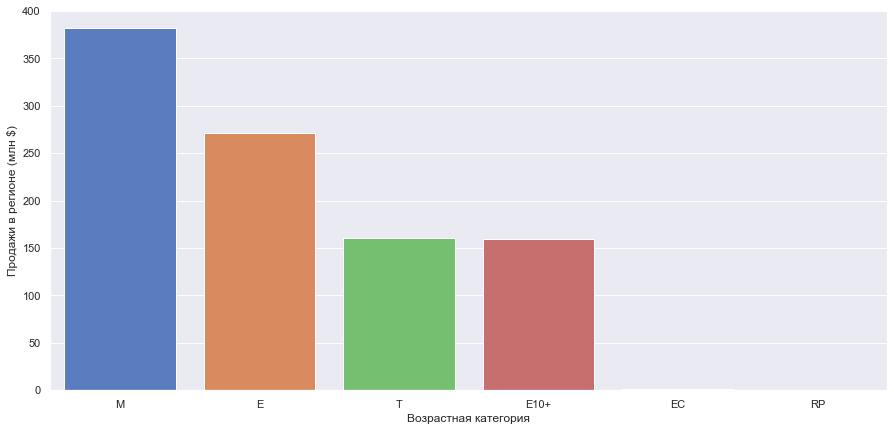

eu_sales


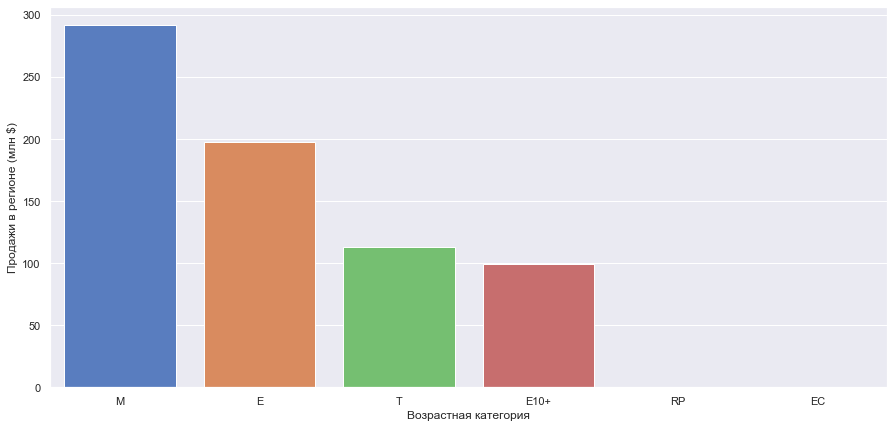

jp_sales


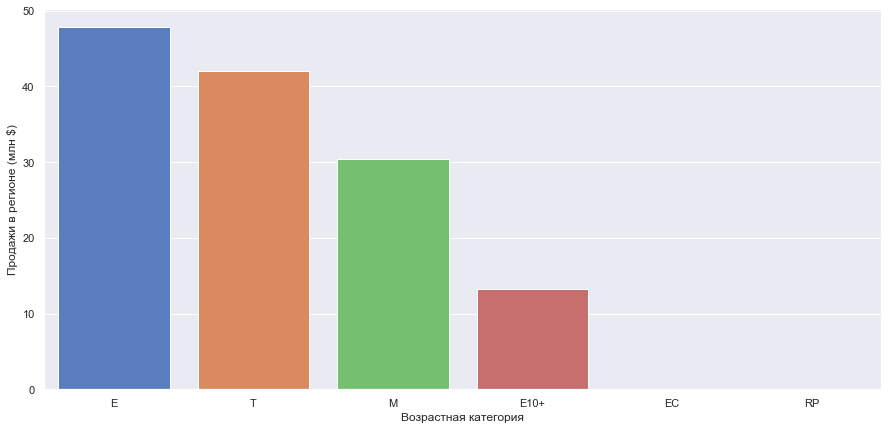

In [63]:
def esrb_sales_dependence(columns_list): 
     for column in columns_list: 
            try:
                esrb_sales_pivot = games_actual_data.pivot_table(index='rating', 
                                                        values=column, 
                                                        aggfunc='sum').sort_values(by=column, ascending=False)
                esrb_sales_pivot = esrb_sales_pivot.reset_index()
                esrb_sales_plot = sns.barplot(x='rating', 
                            y=column,
                            palette='muted',
                            data=esrb_sales_pivot)
                print(column)
                esrb_sales_plot.set(xlabel='Возрастная категория', ylabel='Продажи в регионе (млн $)')
                plt.show()
            except: 
                print('Error')
esrb_sales_dependence(region_sales)

- В Америке и Европе наибольшей популярностью пользуются игры с возрастной категорией M (mature, от 17 лет и старше), E (everyone, для всех возрастов), а также T (teen, для подростков от 13 лет и старше). 
- Что касается Японии, то здесь лидируют игры для всех возрастов. Далее следует подрустки от 13 лет. На третьем месте расположились игры категории M, то есть для людей от 17 лет и старше. 
- Отметим, что у нас отсутствуют данный для категорий RP (rating pending) и EC (early childhood) для всех трех регионов. 

### Вывод
--- 
#### Европа и Америка
- Портреты пользователей Европы и Америки очень похожи. В этих регионах популярны одинаковые платформы – X360 и PS3. Пользователи предпочитают одни и те же жанры игр. Самыми популярными жанрами являются экшн, шутер, спортивные игры, ролевые игры и игры смешанных жанров. Также в этих регионах покупают игры для одних и тех же возрастных категорий - для людей от 17 лет, всех возрастов и подростков от 13 лет. 
---
#### Япония
- Портрет пользователя этого региона сильно отличается от игроков двух предыдущих регионов. Так, в Японии со значительным отрывом лидирует платформа 3DS (было продано игр на 100 млн долларов). Также в первую пятерку вошли такие платформы, как PSP, DS и PSV, которые пользуются значительно меньшей популярностью в Европе и Америке. Отличаются и жанры игр, в которые предпочитают играть геймеры Японии. Так лидером являются ролевые игр, а столь популярный для Европы и Америки жанр экшн находится на втором месте. Японцы также предпочитают приключенческие игры и платформенные. Последние два жанра не вошли даже в пятерку наиболее популярных в Европе и Америке. Отличия были зафиксированы и в возрастных категориях игр. Так у японцев лидируют игр для всех возрастов, на втором месте – игры для подростков от 13 лет, а на третьем – от 17 лет. 
--- 
- Разница в поведении пользоватлей этих регионов может объясняться значительными культурными различиями, а также особенностями рынка производителей игровых платформ. 

<a id='step_5'></a>
### 5. Проверить гипотезы:

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Сформулируем нулевую гипотезу. Помним, что нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. В таком случае наша нулевая гипотеза будет звучать так: **«Средние пользовательские рейтинги платформ Xbox One и PC одинаковые»**.
Исходя из нулевой гипотезы, сформулируем альтернативную гипотезу: 
**«Средние пользовательские рейтинги платформ Xbox One и PC различаются».** 
Далее установим критический уровень статистической значимости: 
alpha=0.05 (общепринятое пороговое значение).

In [64]:
#Сформируем необходимые наборы данных:
XOne = games_actual_data.query('platform == "XOne"')
PC = games_actual_data.query('platform == "PC"')
#Проведем исследование, чтобы принять или отвергнуть нулевую гипотзеу: 
alpha=0.05
results = st.ttest_ind(
    XOne.user_score, 
    PC.user_score, nan_policy='omit')
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9809981106491932
Не получилось отвергнуть нулевую гипотезу


#### Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
Сформулируем нулевую гипотезу: **Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») равны.**
Сформулируем альтернативную гипотезу: **Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.**

In [65]:
#Сформируем необходимые наборы данных:
Action = games_actual_data.query('genre == "Action"')
Sports = games_actual_data.query('genre == "Sports"')
#Проведем исследование, чтобы принять или отвергнуть нулевую гипотзеу: 
alpha=0.05
results = st.ttest_ind(
    Action.user_score, 
    Sports.user_score, nan_policy='omit')
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.839124224335758e-19
Отвергаем нулевую гипотезу


In [66]:
#Дополнительно сравним выборочное среднее: 
Action_mean = np.mean(Action.user_score)
Sports_mean = np.mean(Sports.user_score)
print('Средний пользовательский рейтинг жанра Action:', Action_mean)
print('Средний пользовательский рейтинг жанра Sports:', Sports_mean)



Средний пользовательский рейтинг жанра Action: 6.781899871630309
Средний пользовательский рейтинг жанра Sports: 5.901587301587301


### Вывод
Мы выяснили, что пользователи одинаково оценивают игры на платформах Xbox One и PC. Что касается жанров, что пользовательские рейтинги для жанров экшн и спорт отличаются. 

<a id='step_6'></a>
### 6. Общий вывод
--- 
Кратко опишем все проделанное нами в работе: 
- На первом этапе мы изучили общую информацию и выявили проблему с наименованием столбцов, большое количество пропусков в данных, а также определили столбцы, где нужно исправить тип данных. 
- На втором этапе мы привели названия столбцов к нижнему регистру, преобразовали данные к нужному типу (столбцы user_score, year_of_release), обработали пропущенные значения (столбцы name, genre, year_of_release, user_score), посчитали суммарные продажи в регионах. 
- Далее был проведен исследовательский анализ данных. Так, мы определили актуальный для исследования период, выбрали потенциально прибыльные платформы, посмотрели разницу в продажах для платформ и влияние оценок критиков и пользователей на продажи, а также узнали, какие жанры являются наиболее и наименее прибыльными. 
- На четвертом этапе мы составили портрет пользователей для каждого региона (Северная Америка, Европа и Япония). Мы узнали самые популярные платформы, жанры и возрастные категории для этих областей. 
- На пятом шаге были проверены гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC и о равенстве средних пользовательских рейтингов для жанров экшн и спорт. 
- На последнем этапе работы был сделан обощающий вывод для полученных результатов. 
--- 
На основании данных за период с 2010 по 2016 гг. можно выявить следующие закономерности касательно успешности игры: 
- Стоит обратить внимание на такие платформы, как PS4, XOne и 3DS. Именно эти платформы имеют наибольшую выручку от продаж игр за последние два года. Так, для PS4 в 2015 году было продано игр на сумму 119 млн долларов, в 2016 – на 69; для XOne в 2015 - на 60 млн, в 2016 – на 26 млн, для 3DS в 2015 и 2016 гг. - на 28 и 15 млн соответственно.  
- Также мы не выявили зависимость продаж игр от оценок пользователей и критиков. Зависимость объема продаж от оценок критиков была выявлена для пяти платформ из 12. К таковым относятся X360 (коэфф. корр., здесь и далее в скобках: 0,7 ), PS3 (0,7), PS4 (0,7), XOne (0,6) и PC (0,7). Что касается зависимости объема продаж от оценок пользователей, то здесь также не было выявлено зависимости. Для большей части платформ коэффициент корреляции находится в пределах (0,5). Исключением является платформа WiiU. Показатель коэффициента корреляции – 0.6. Диаграмма рассеяния также свидетельствует о наличии зависимости для этих двух показателей.
- Жанр игры также влияет на объем продаж. Так, наибольшая прибыль была получена от игр в жанрах экшн (673  млн долларов) и шутер (480 млн долларов), а наименьшая – от стратегий (36 млн долларов) и головоломок (21 млн долларов). 
- Отдельно стоит отметить, разницу в портретах пользователей Еворпы, Америки и Японии. В первых двух регионах поведение пользователей очень схоже. В Европе и Америке пользователи отдают предпочтение таким платформам, как X360 и PS3, а в Японии лидирует 3DS. Жители Европы и Америки отдают предпочтение жанрам экшн, шутер и спортивные играм. А вот жители Японии любят ролевые игры, хотя жанр экшн у них также очень популярен. Японцы предпочитают приключенческие игры и платформенные. Эти жанры не вошли в пятерку наиболее популярных жанров для Европы и Америки. Что касается возрастных категорий игр, то и в них есть отличия. Так жители Америки и Европы предпочитают игры для людей от 17 лет, всех возрастов и подростков от 13 лет. Японцы чаще всего покупают игры для людей всех возрастов, на втором месте – игры для подростков от 13 лет, а на третье – от 17 лет. 
- Мы также выявили, что средние пользовательские рейтинги одинаковы для платформ Xbox One и PC. 
- Средний пользовательский рейтинг выше для жанра Action по сравнению с жанром Sports: в среднем игры жанра экшн оцениваются в 7 баллов, а спортивные игры – в 6.